In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ticker='TSLA'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2010-01-01')['Adj Close']

In [3]:
log_returns=np.log(1+data.pct_change())

#log_returns=np.log(data/data.shift(1))
#log_returns.tail()

In [4]:
log_returns.tail()

,TSLA
Date,
2020-05-08,0.049252
2020-05-11,-0.009971
2020-05-12,-0.002320
2020-05-13,-0.023058
2020-05-14,0.015518


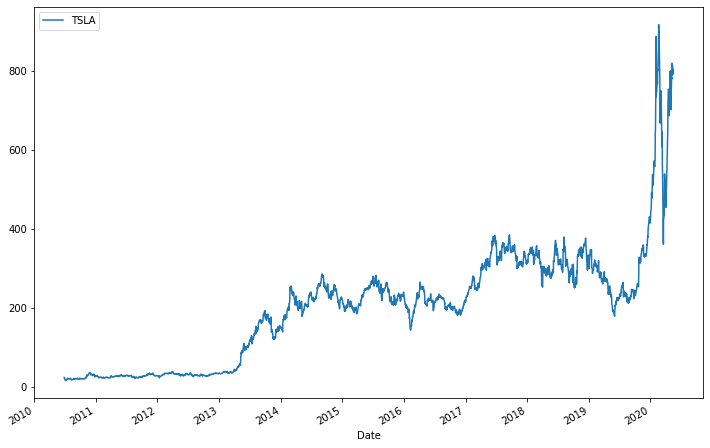

In [5]:
data.plot(figsize=(12,8));

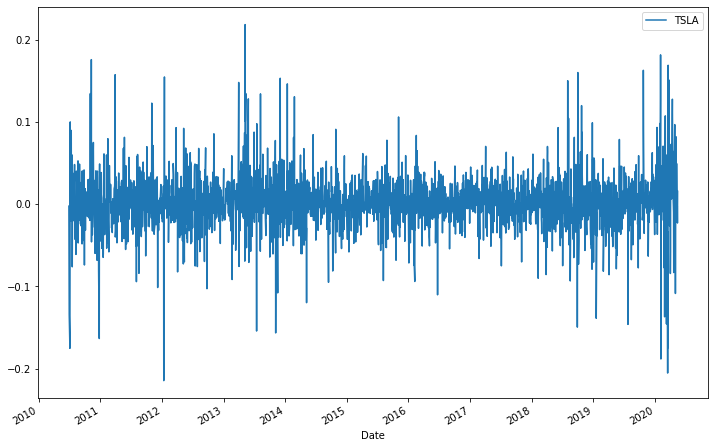

In [6]:
log_returns.plot(figsize=(12,8));

In [7]:
u=log_returns.mean()
u

TSLA    0.001414
dtype: float64

In [8]:
v=log_returns.mean()
v

TSLA    0.001414
dtype: float64

In [9]:
# Drift

drift=u-(0.5*v)
drift

TSLA    0.000707
dtype: float64

In [10]:
stdev=log_returns.std()
stdev

TSLA    0.034348
dtype: float64

In [11]:
# Part II

In [12]:
drift.values

array([0.00070702])

In [13]:
stdev.values

array([0.03434834])

In [14]:
norm.ppf(0.95)

1.6448536269514722

In [15]:
x=np.random.rand(10,2)
x

array([[0.49494038, 0.36842675],
       [0.71251363, 0.98279541],
       [0.21728079, 0.89882321],
       [0.24031748, 0.68555471],
       [0.78994945, 0.13958689],
       [0.2407616 , 0.44457809],
       [0.39090065, 0.2845537 ],
       [0.7784283 , 0.57200498],
       [0.91052016, 0.78587185],
       [0.53934249, 0.47099885]])

In [16]:
norm.ppf(x)

array([[-0.01268294, -0.33602304],
       [ 0.56074302,  2.11524384],
       [-0.78140968,  1.27487475],
       [-0.70528169,  0.48328895],
       [ 0.80624586, -1.08217725],
       [-0.70385482, -0.13937201],
       [-0.27697239, -0.56936656],
       [ 0.76689594,  0.181481  ],
       [ 1.34396505,  0.79217901],
       [ 0.09877738, -0.07275926]])

In [17]:
z=norm.ppf(np.random.rand(10,2))
z

array([[ 0.59549125, -1.20631726],
       [-1.78602027,  0.78156122],
       [ 1.47328149,  0.23229931],
       [ 1.32035369, -0.10837205],
       [-0.3001987 , -1.96138882],
       [ 0.68669272, -0.08702067],
       [-1.08738236,  0.36054108],
       [-0.10044283, -0.6978967 ],
       [-0.132201  ,  1.78733655],
       [-1.69033788,  0.99707788]])

In [38]:
t_intervals=1000
iterations=50

In [39]:
Z=norm.ppf(np.random.rand(t_intervals,iterations))
Z

array([[ 0.5340633 ,  1.04640871,  0.70287565, ...,  0.37590931,
         0.13074095,  0.55196801],
       [ 0.8224689 , -0.18970236,  1.04980305, ..., -0.81849341,
         1.52306064, -0.2193648 ],
       [ 0.37578663,  1.24674122,  1.18779674, ...,  2.4571061 ,
        -0.7376474 , -0.11453954],
       ...,
       [-1.62262745, -0.39396221,  1.34869585, ...,  0.93385927,
        -2.02068419, -1.51462012],
       [-1.28686949, -0.24229092, -1.40769277, ...,  1.1461089 ,
        -1.26819829,  1.01624002],
       [-0.87062954,  2.02181101, -2.3838532 , ...,  1.06437068,
        -0.67230453,  1.2766549 ]])

In [40]:
# daily returns =e^r
# where r=drift+stdev.z

In [41]:
r=(drift.values+(stdev.values*Z))
r

array([[ 0.01905121,  0.03664942,  0.02484963, ...,  0.01361888,
         0.00519775,  0.0196662 ],
       [ 0.02895746, -0.00580894,  0.03676601, ..., -0.02740687,
         0.05302162, -0.0068278 ],
       [ 0.01361467,  0.04353051,  0.04150586, ...,  0.08510453,
        -0.02462994, -0.00322722],
       ...,
       [-0.05502754, -0.01282493,  0.04703248, ...,  0.03278353,
        -0.06870012, -0.05131766],
       [-0.04349481, -0.00761527, -0.04764489, ...,  0.04007396,
        -0.04285348,  0.03561318],
       [-0.02919766,  0.07015287, -0.08117437, ...,  0.03726638,
        -0.02238552,  0.04455799]])

In [42]:
daily_returns=np.exp(r)
daily_returns

array([[1.01923384, 1.03732929, 1.02516096, ..., 1.01371204, 1.00521129,
        1.01986086],
       [1.0293808 , 0.9942079 , 1.03745024, ..., 0.97296529, 1.05445244,
        0.99319546],
       [1.01370777, 1.04449186, 1.04237927, ..., 1.08883088, 0.9756709 ,
        0.99677798],
       ...,
       [0.94645909, 0.98725696, 1.04815605, ..., 1.03332683, 0.93360661,
        0.94997685],
       [0.95743753, 0.99241365, 0.95347232, ..., 1.04088775, 0.95805175,
        1.03625492],
       [0.97122448, 1.07267215, 0.9220329 , ..., 1.03796948, 0.97786317,
        1.04556561]])

In [23]:
# Part III

In [43]:
data.tail()

,TSLA
Date,
2020-05-08,819.419983
2020-05-11,811.289978
2020-05-12,809.409973
2020-05-13,790.960022
2020-05-14,803.330017


In [44]:
S0=data.iloc[-1]
S0

TSLA    803.330017
Name: 2020-05-14 00:00:00, dtype: float64

In [45]:
price_list=np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
price_list[0]=S0
price_list

array([[803.33001709, 803.33001709, 803.33001709, ..., 803.33001709,
        803.33001709, 803.33001709],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [47]:
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]
    
price_list

array([[  803.33001709,   803.33001709,   803.33001709, ...,
          803.33001709,   803.33001709,   803.33001709],
       [  826.9324985 ,   798.67704852,   833.4149185 , ...,
          781.61222535,   847.07329949,   797.86372642],
       [  838.26789738,   834.21167582,   868.73443784, ...,
          851.04352447,   826.46476911,   795.29299317],
       ...,
       [ 5105.89399399, 16107.42196768,  2211.775671  , ...,
          444.30878571,   345.73512296,   313.86817753],
       [ 4888.57451204, 15985.22547295,  2108.86687665, ...,
          462.47557271,   331.23213994,   325.24744327],
       [ 4747.90322027, 17146.90610489,  1944.44463946, ...,
          480.03553088,   323.89971169,   340.06754186]])

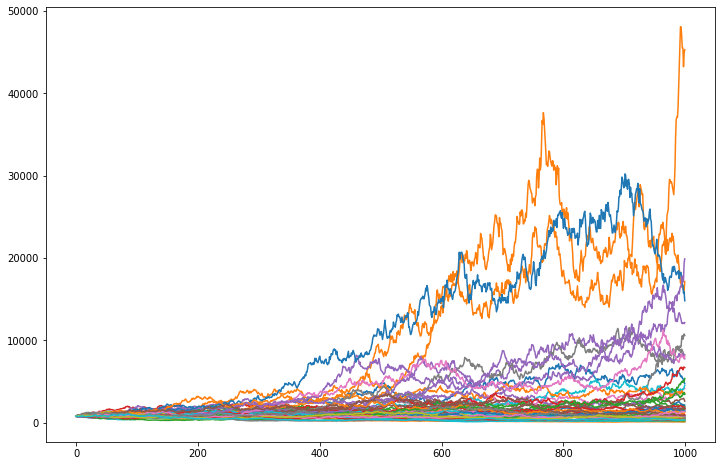

In [48]:
plt.figure(figsize=(12,8));
plt.plot(price_list);#[:251,:1000]);
#plt.xlim([0,251])
#plt.ylim([0,1400])

(0, 400)

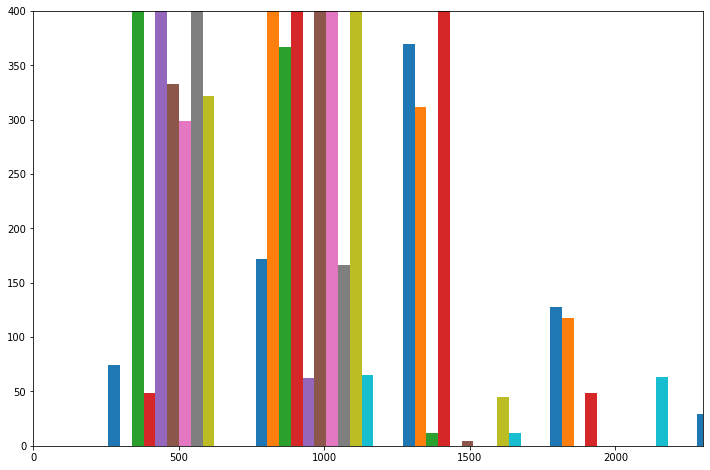

In [30]:
plt.figure(figsize=(12,8));
plt.hist(price_list,bins=20);
plt.xlim([0,2300])
plt.ylim([0,400])